# Supervised Learning: Beat US Stock Market (2019 edition)

### Notebook by Catarina Fernandes, Diogo Almeida, Pedro Queirós
#### Supported by [Luís Paulo Reis](https://web.fe.up.pt/~lpreis/)
#### [Faculdade de Engenharia da Universidade do Porto](https://sigarra.up.pt/feup/pt/web_page.inicial)


## Table of contents

1. [Introduction](#Introduction)

2. [Required libraries and Models](#Required-libraries-and-Models)
    - [Libraries](#Libraries)   
    - [Models](#Models)

3. [The problem domain](#The-problem-domain)

4. [Step 1: Data Analysis](#Step-1:-Data-Analysis)


## Introduction

[[ go back to the top ]](#Table-of-contents)



## Libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

Let's start by importing everything that we need:

In [1]:
# For warning suppression
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.tree import tree, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

## The problem domain

[[ go back to the top ]](#Table-of-contents)


## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to design a predictive model capable of evaluating and finding stocks that are worth to invest on, based in the 10-K filings of each company.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified stocks — to quantify how well our model is performing. To ensure that the investers have profit, we should achieve an accuracy of 50% or greater.

>Did you understand the context for the question and the scientific or business application?

TODO

>Did you record the experimental design?

TODO

>Did you consider whether the question could be answered with the available data?

TODO

<hr />


## Data Checking

[[ go back to the top ]](#Table-of-contents)

There are 2 datasets available:
- 10_k_fillings.csv: Contains a table where each row is a US stock from the technology sector and each column is a financial indicator from their 10-K annual report. The last column from this dataset is the class (0 = IGNORE, 1 = BUY).
- price_variation.csv: Contains a table where each row is a US stock from the technology sector and each column indicates the stock's price variation (%) in 2019.

### 10_k_fillings.csv

We will use the 10_k_fillings.csv file for our training/testing set, but first, it is required that we analyse it to make sure it doesn't have any problems.

In [2]:
ten_k_fillings_data = pd.read_csv('10_k_fillings.csv')
ten_k_fillings_data

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,...,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,SG&A Expenses Growth,class
0,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,6.750000e+09,2.042100e+10,2.331600e+10,2.331700e+10,2.105300e+10,...,1.2513,-0.0191,-0.0277,0.3312,0.3793,0.1989,0.0382,0.1014,-0.0942,1
1,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,8.130000e+08,2.897000e+09,1.499400e+10,1.430300e+10,1.413500e+10,...,1.6100,0.0579,0.0650,1.1342,1.4922,0.4573,0.2275,0.6395,0.0942,1
2,AAPL,2.655950e+11,0.1586,1.637560e+11,1.018390e+11,1.670500e+10,3.094100e+10,7.089800e+10,7.290300e+10,5.953100e+10,...,0.2932,-0.0502,-0.0479,0.2057,0.2385,0.3734,-0.0256,-0.1584,0.0946,1
3,MSFT,1.103600e+11,0.1428,3.835300e+10,7.200700e+10,2.222300e+10,3.694900e+10,3.505800e+10,3.647400e+10,1.657100e+10,...,-0.3446,-0.0059,-0.0049,0.1108,0.0279,0.1806,0.0341,-0.0512,0.1144,1
4,HPQ,5.847200e+10,0.1233,4.780300e+10,1.066900e+10,4.859000e+09,6.605000e+09,4.064000e+09,3.013000e+09,5.327000e+09,...,1.2027,-0.0432,-0.0400,0.2314,0.2422,0.1584,0.0519,0.8039,0.1104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,TRNS,1.551410e+08,0.0781,1.177000e+08,3.744100e+07,2.841500e+07,2.841500e+07,9.026000e+06,7.948000e+06,5.922000e+06,...,0.2656,0.0186,0.0270,0.3089,0.7012,0.1190,0.0513,0.1616,0.0510,1
634,TSRI,6.499000e+07,0.0386,5.460910e+07,1.038090e+07,9.471523e+06,9.471523e+06,9.093770e+05,8.672080e+05,4.862080e+05,...,0.7857,0.0000,0.0000,0.5068,0.5036,-0.0154,-0.0800,0.0629,-0.0219,0
635,TZOO,1.113220e+08,0.0450,1.226800e+07,9.905400e+07,8.182300e+07,9.081600e+07,8.238000e+06,8.286000e+06,4.661000e+06,...,0.3704,-0.0434,-0.0298,1.5612,2.5239,0.0745,-0.0492,0.1241,0.0248,1
636,WSTG,1.814440e+08,0.1300,1.545240e+08,2.692000e+07,2.031900e+07,2.276500e+07,4.155000e+06,5.117000e+06,3.538000e+06,...,-0.3097,0.0137,0.0137,7.8783,6.7290,-0.0129,0.0313,0.0339,0.0548,1


It looks like the data is correct and there aren't any empty cells. We can see that the first column containing the Company's stock ticker is unnamed, although this column will be irrelevant later on, we should still probably give it a name:

In [3]:
ten_k_fillings_data.rename(columns={'Unnamed: 0':'Ticker'}, inplace=True)
ten_k_fillings_data

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,...,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,SG&A Expenses Growth,class
0,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,6.750000e+09,2.042100e+10,2.331600e+10,2.331700e+10,2.105300e+10,...,1.2513,-0.0191,-0.0277,0.3312,0.3793,0.1989,0.0382,0.1014,-0.0942,1
1,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,8.130000e+08,2.897000e+09,1.499400e+10,1.430300e+10,1.413500e+10,...,1.6100,0.0579,0.0650,1.1342,1.4922,0.4573,0.2275,0.6395,0.0942,1
2,AAPL,2.655950e+11,0.1586,1.637560e+11,1.018390e+11,1.670500e+10,3.094100e+10,7.089800e+10,7.290300e+10,5.953100e+10,...,0.2932,-0.0502,-0.0479,0.2057,0.2385,0.3734,-0.0256,-0.1584,0.0946,1
3,MSFT,1.103600e+11,0.1428,3.835300e+10,7.200700e+10,2.222300e+10,3.694900e+10,3.505800e+10,3.647400e+10,1.657100e+10,...,-0.3446,-0.0059,-0.0049,0.1108,0.0279,0.1806,0.0341,-0.0512,0.1144,1
4,HPQ,5.847200e+10,0.1233,4.780300e+10,1.066900e+10,4.859000e+09,6.605000e+09,4.064000e+09,3.013000e+09,5.327000e+09,...,1.2027,-0.0432,-0.0400,0.2314,0.2422,0.1584,0.0519,0.8039,0.1104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,TRNS,1.551410e+08,0.0781,1.177000e+08,3.744100e+07,2.841500e+07,2.841500e+07,9.026000e+06,7.948000e+06,5.922000e+06,...,0.2656,0.0186,0.0270,0.3089,0.7012,0.1190,0.0513,0.1616,0.0510,1
634,TSRI,6.499000e+07,0.0386,5.460910e+07,1.038090e+07,9.471523e+06,9.471523e+06,9.093770e+05,8.672080e+05,4.862080e+05,...,0.7857,0.0000,0.0000,0.5068,0.5036,-0.0154,-0.0800,0.0629,-0.0219,0
635,TZOO,1.113220e+08,0.0450,1.226800e+07,9.905400e+07,8.182300e+07,9.081600e+07,8.238000e+06,8.286000e+06,4.661000e+06,...,0.3704,-0.0434,-0.0298,1.5612,2.5239,0.0745,-0.0492,0.1241,0.0248,1
636,WSTG,1.814440e+08,0.1300,1.545240e+08,2.692000e+07,2.031900e+07,2.276500e+07,4.155000e+06,5.117000e+06,3.538000e+06,...,-0.3097,0.0137,0.0137,7.8783,6.7290,-0.0129,0.0313,0.0339,0.0548,1



With that sorted out, we can now take a look at some summary statistics about the dataset:

In [4]:
ten_k_fillings_data.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,...,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Asset Growth,Book Value per Share Growth,SG&A Expenses Growth,class
count,6.380000e+02,638.000000,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,6.380000e+02,...,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,4.313656e+09,0.200593,2.418867e+09,1.893674e+09,6.838895e+08,1.209286e+09,6.849852e+08,6.876940e+08,5.387035e+08,5.365020e+08,...,0.367957,0.327554,0.354594,0.024223,0.342144,0.282030,0.160931,0.134593,0.112316,0.706897
std,1.832010e+10,1.236156,1.060182e+10,8.412074e+09,2.367724e+09,5.087444e+09,4.005216e+09,4.214649e+09,3.416454e+09,3.416642e+09,...,9.258839,4.700736,4.719772,10.419881,6.941349,1.567491,0.453783,1.487802,0.231320,0.455543
min,0.000000e+00,-0.959300,0.000000e+00,-2.970810e+08,7.926000e+05,-6.190000e+05,-1.268450e+09,-1.326000e+09,-4.964000e+09,-4.964000e+09,...,-136.000000,-0.158700,-0.229800,-197.027800,-31.936200,-1.000000,-0.864500,-17.090900,-0.641900,0.000000
25%,1.027300e+08,0.008600,4.501450e+07,3.723250e+07,2.861450e+07,4.583850e+07,-9.972250e+06,-1.322625e+07,-1.706438e+07,-1.767875e+07,...,-0.259475,-0.000375,-0.002425,-0.217250,-0.316125,-0.037050,-0.032350,-0.106900,-0.013300,0.000000
50%,4.539775e+08,0.100800,1.950135e+08,2.097740e+08,1.291985e+08,1.934000e+08,8.819500e+06,6.248500e+06,4.420444e+06,4.163274e+06,...,0.264250,0.014350,0.016250,0.118200,0.126250,0.099400,0.054200,0.035150,0.079900,1.000000
75%,1.896714e+09,0.231325,9.058808e+08,8.405540e+08,4.252228e+08,6.439558e+08,1.660810e+08,1.378770e+08,1.100322e+08,1.090343e+08,...,0.791325,0.060050,0.078225,0.497250,0.589150,0.282983,0.211925,0.174850,0.188800,1.000000
max,2.655950e+11,29.980400,1.637560e+11,1.018390e+11,2.445900e+10,8.131000e+10,7.089800e+10,7.290300e+10,5.953100e+10,5.953100e+10,...,100.000000,117.904200,117.904200,73.783500,148.819100,26.980800,3.653900,22.552600,1.944900,1.000000


Although the dataset contains a lot of columns, the data looks fine, nothing indicates that there is something wrong with any particular column. There are, however, a lot more rows that are classified as 1 (gone up in price) than rows that are classified as 0 (gone down in price), this can lead to lower precision for rows that are classified as 0, since there will be less data in the training set for this class.

### price_variation.csv

Although it won't be used in the training/testing set, let's now take a look at the price_variation.csv file, that can be used to find a correlation in data when analysed together with the previous dataset. We apply the same process as before:

In [5]:
variation_data = pd.read_csv('price_variation.csv')
variation_data.rename(columns={'Unnamed: 0':'Ticker'}, inplace=True)
variation_data

,Ticker,2019 PRICE VAR [%]
0,INTC,30.295514
1,MU,64.213737
2,AAPL,88.742465
3,MSFT,58.259263
4,HPQ,3.016789
...,...,...
652,TSRI,-25.208338
653,TZOO,18.232040
654,USATP,67.826091
655,WSTG,68.702657


In [6]:
variation_data.describe()

,2019 PRICE VAR [%]
count,657.000000
mean,28.340367
std,60.689309
min,-98.760417
25%,-8.446871
50%,22.631823
75%,58.259263
max,478.821387


Once again, there doesn't seem to be anything wrong with the dataset, all entries look normal.

Finally, let's also take a look at some scatterplots for all the columns in relation to the price variation in 2019. We'll first have to merge both datasets' tables and iterate through each column to generate each scatterplot graph.

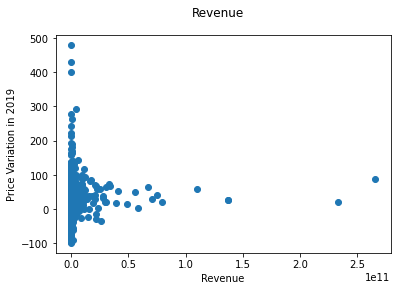

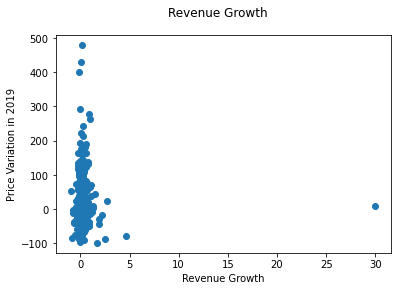

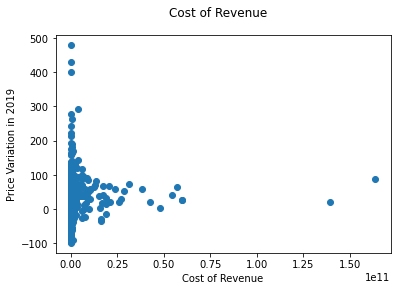

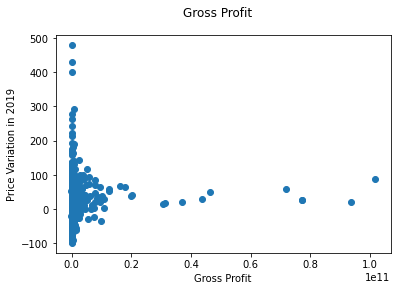

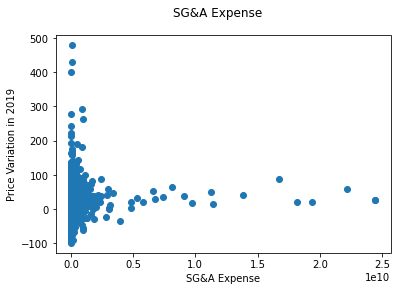

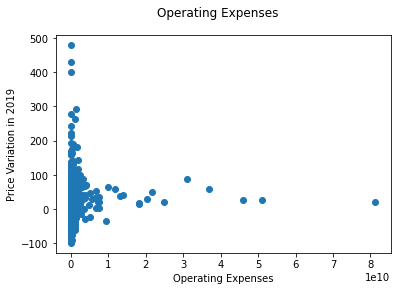

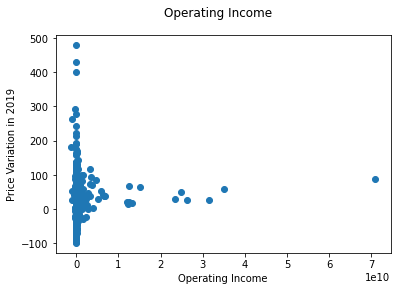

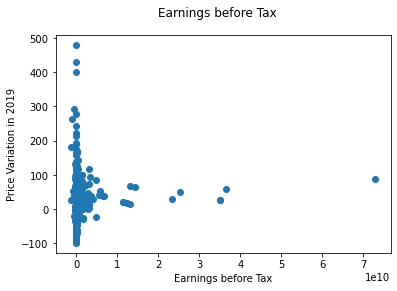

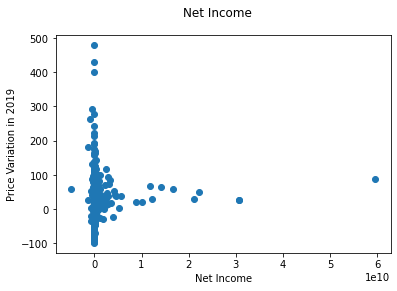

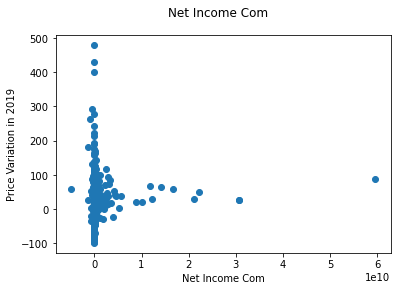

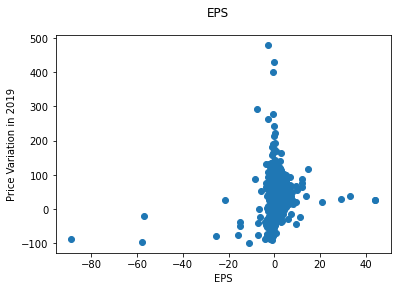

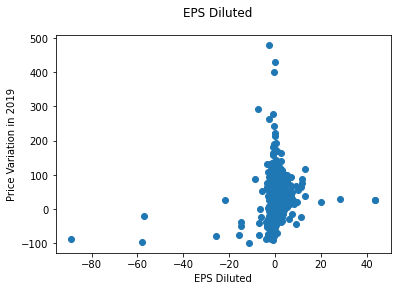

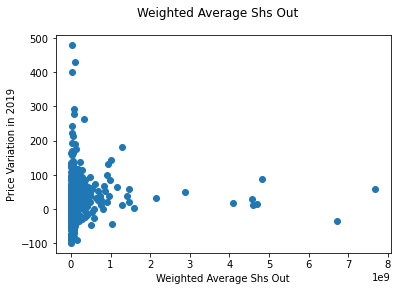

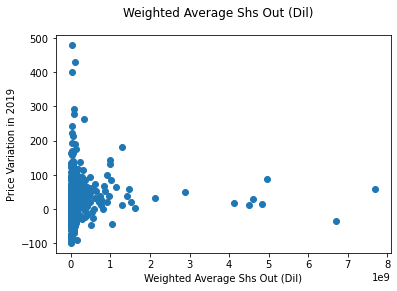

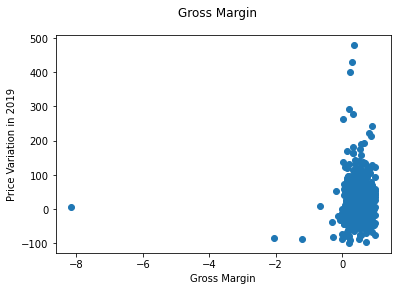

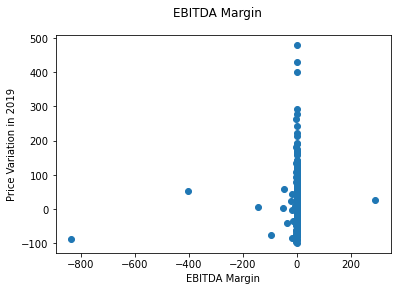

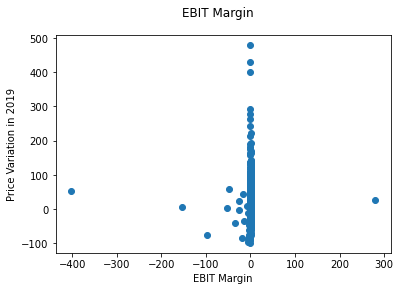

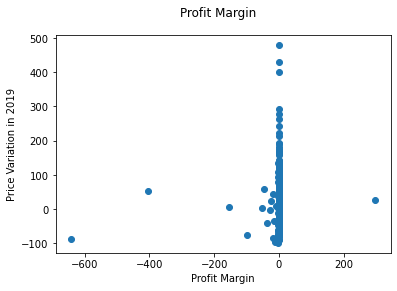

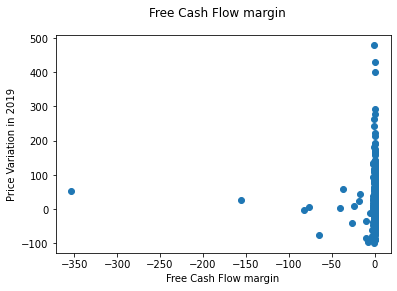

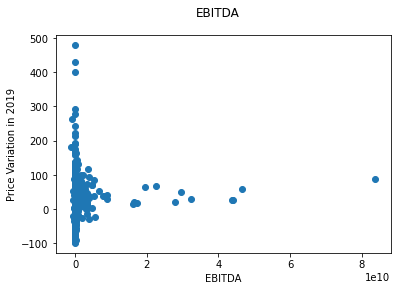

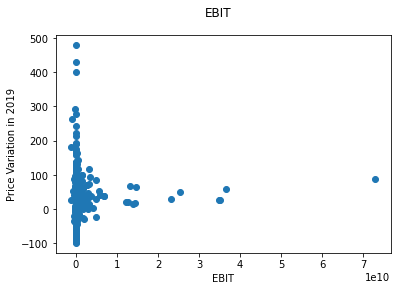

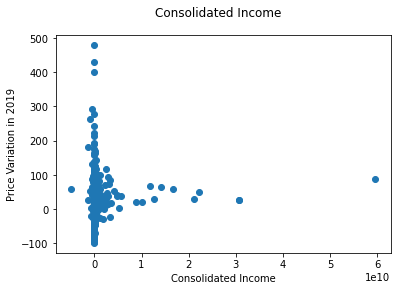

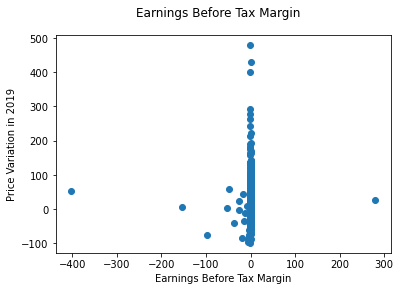

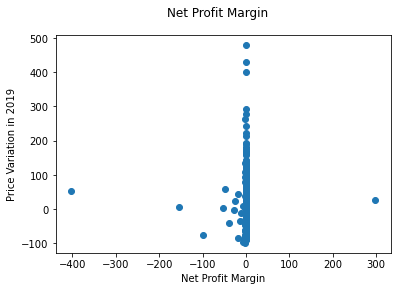

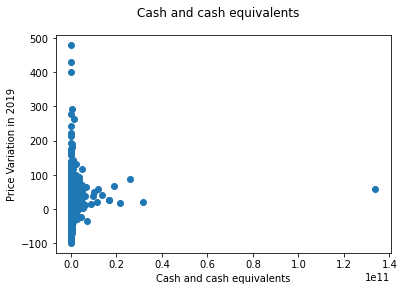

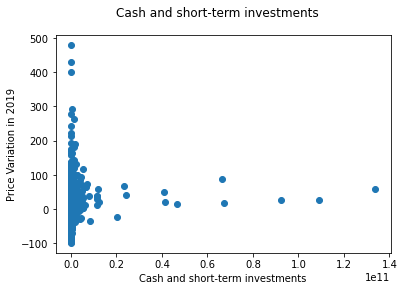

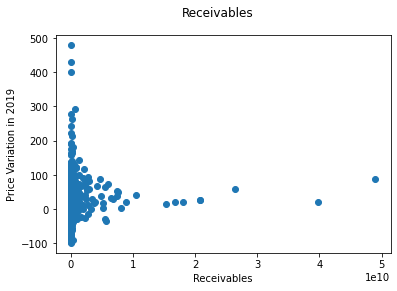

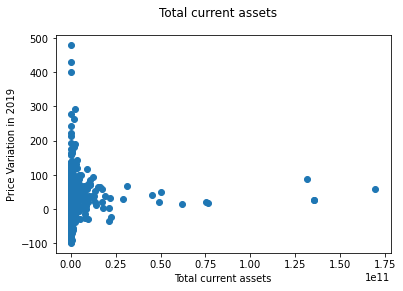

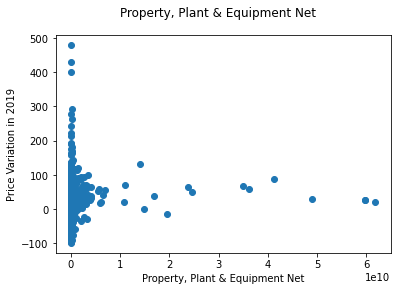

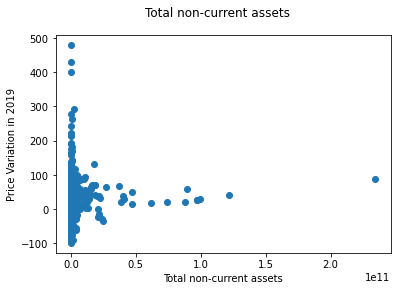

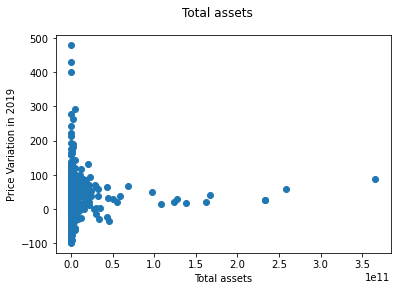

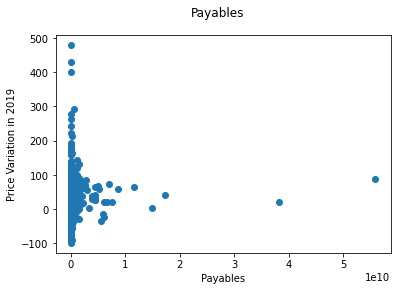

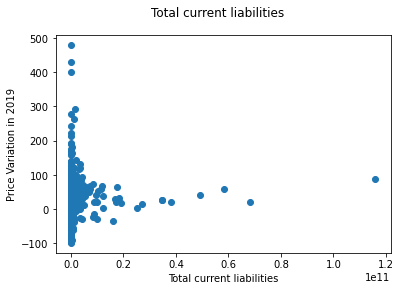

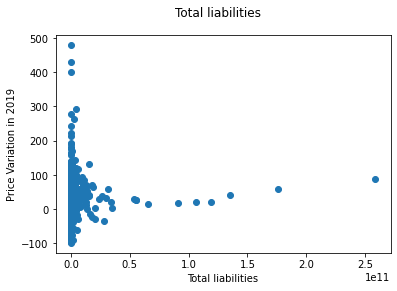

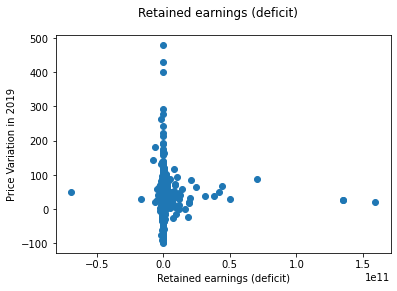

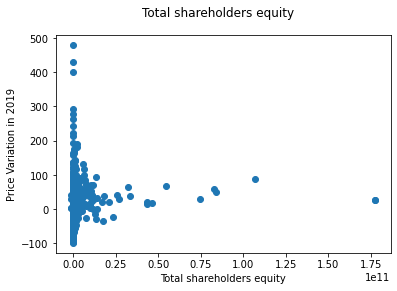

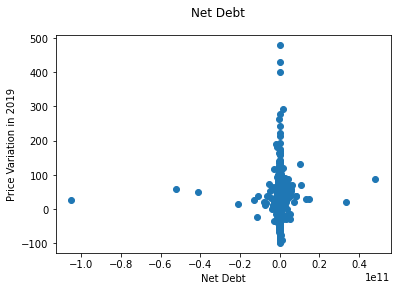

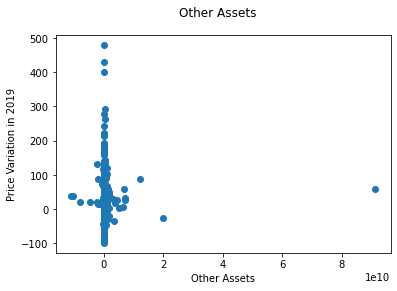

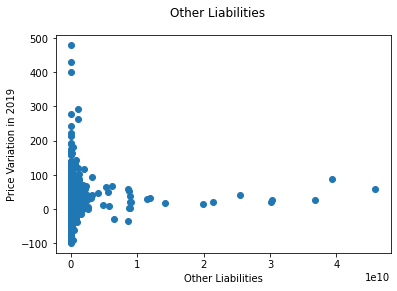

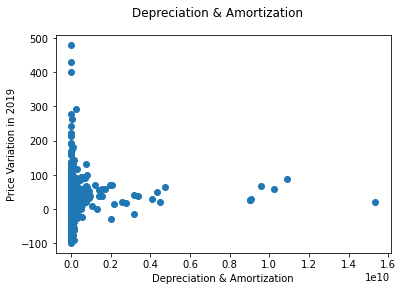

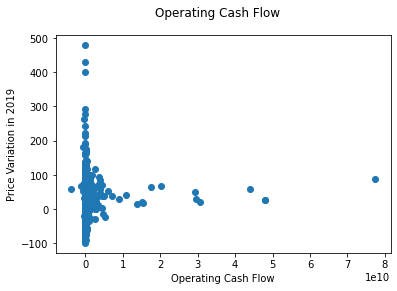

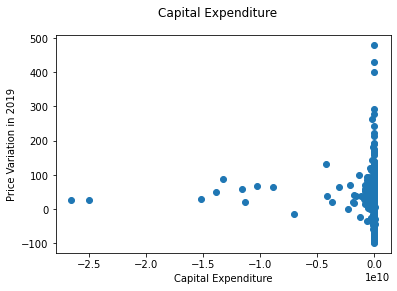

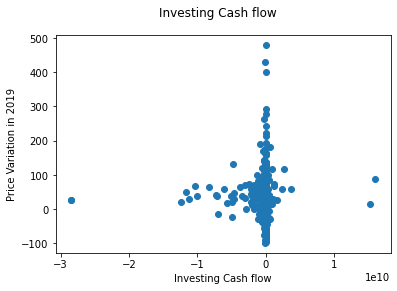

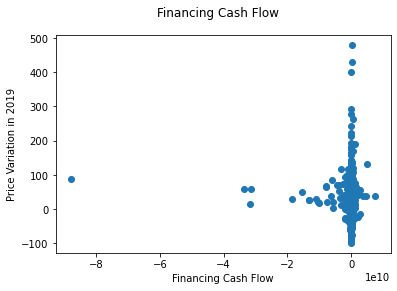

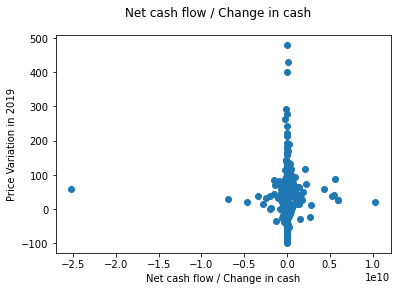

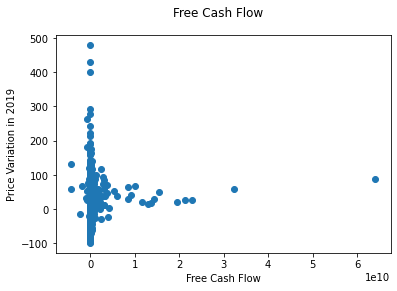

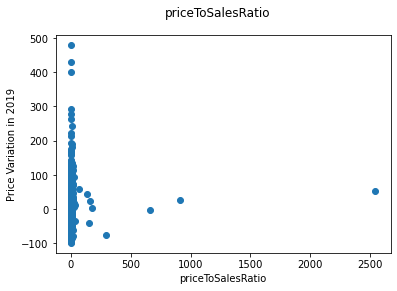

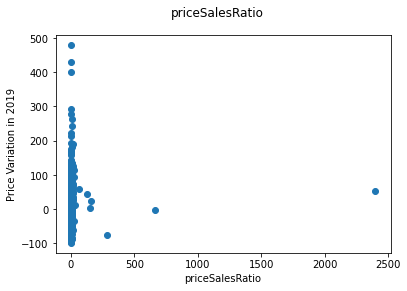

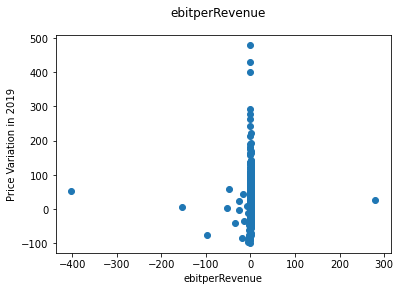

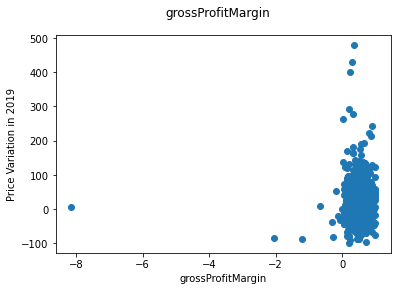

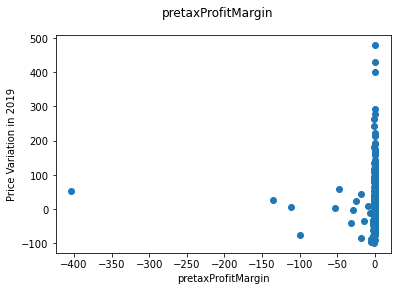

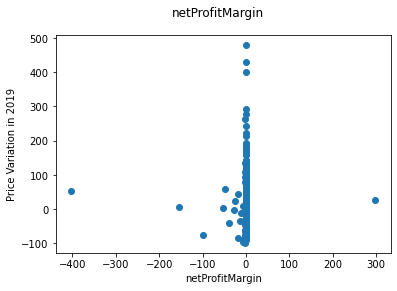

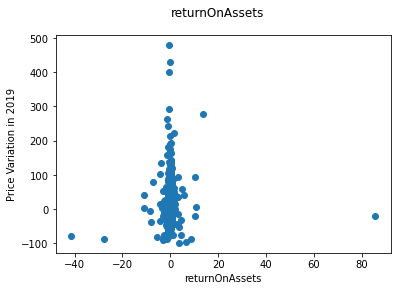

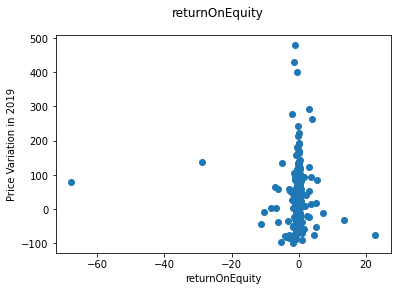

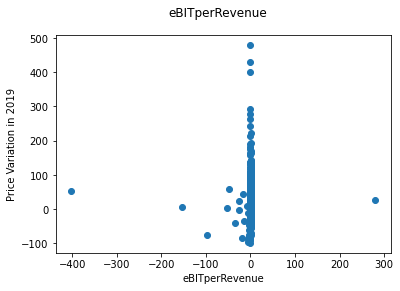

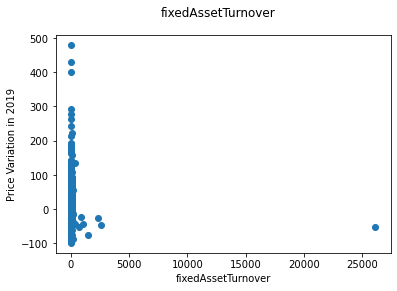

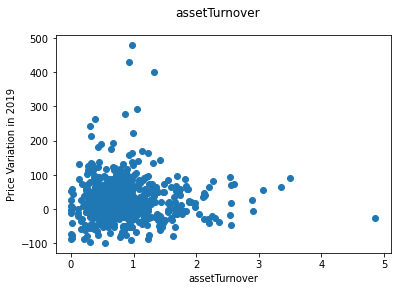

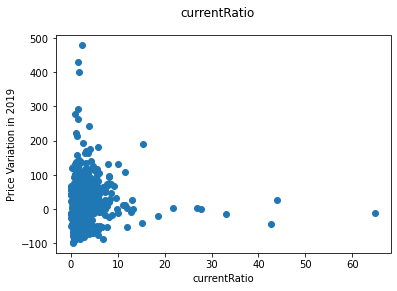

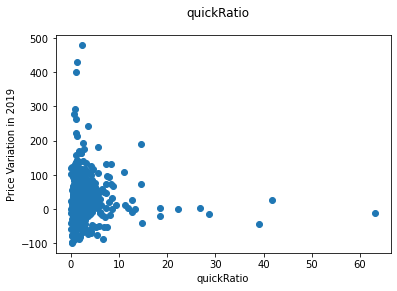

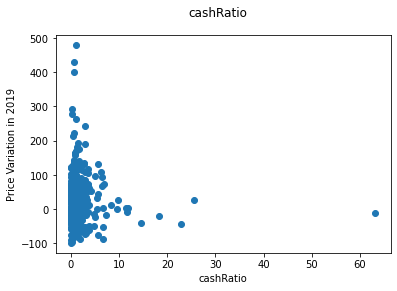

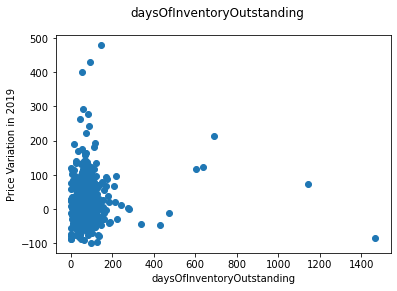

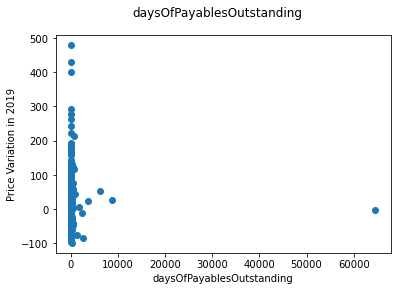

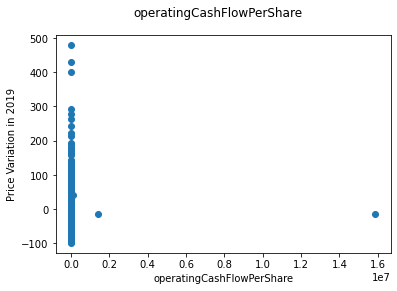

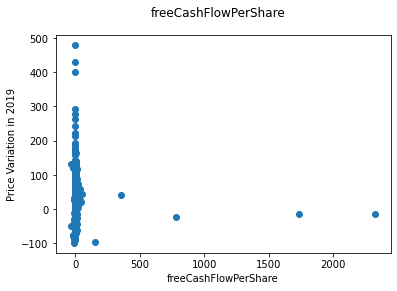

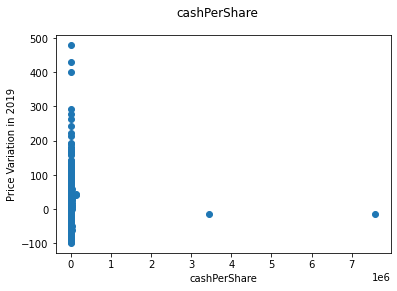

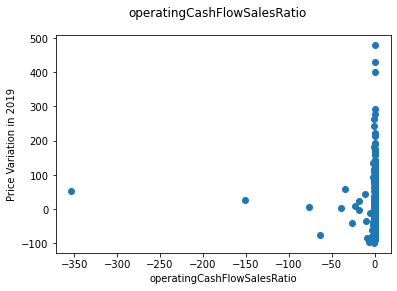

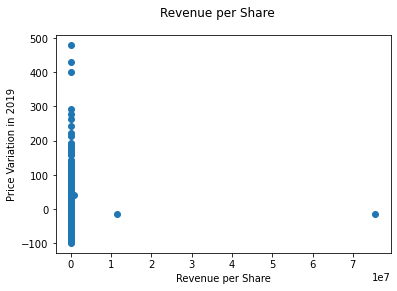

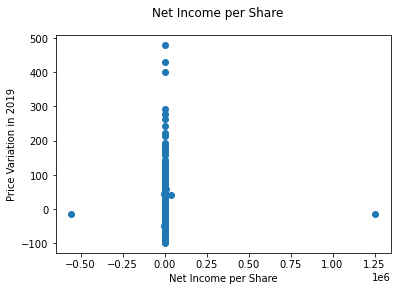

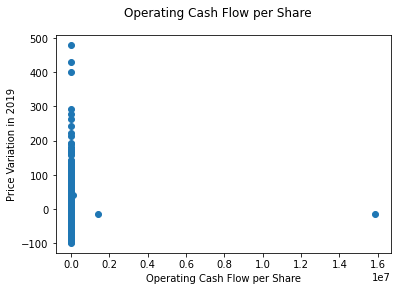

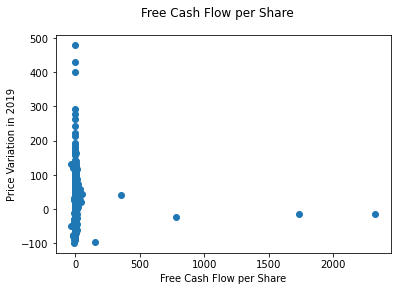

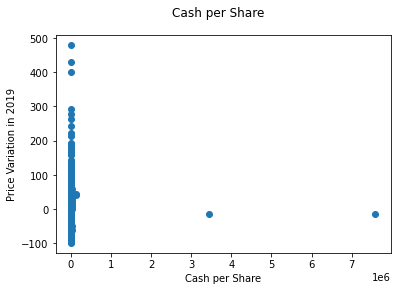

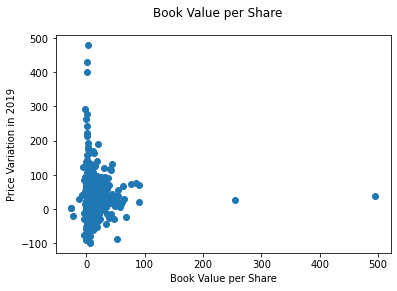

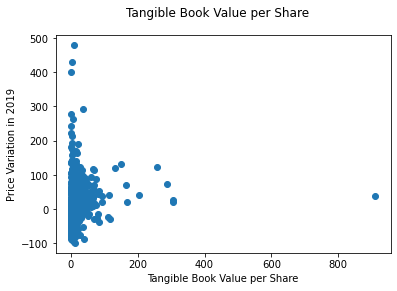

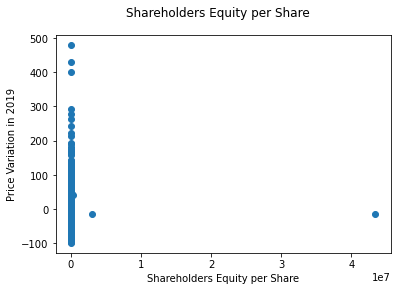

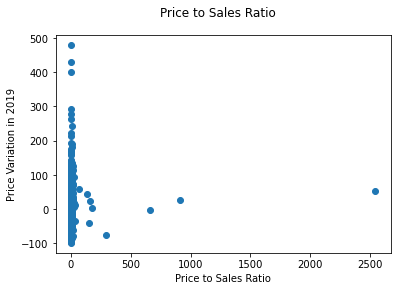

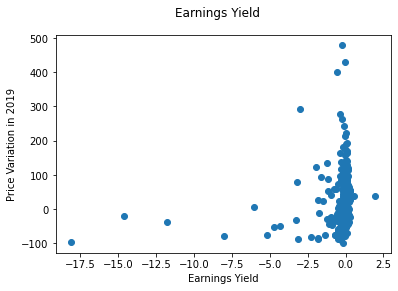

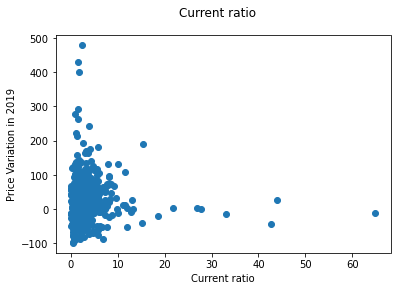

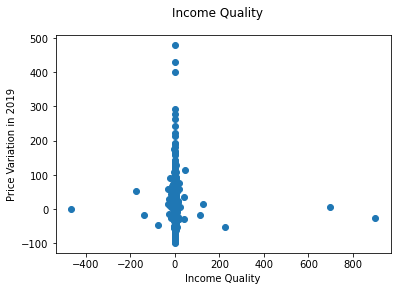

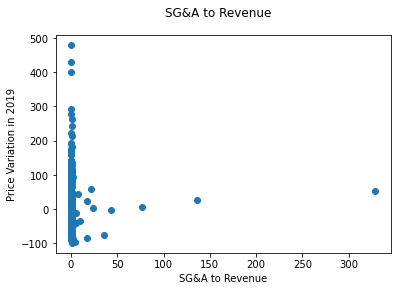

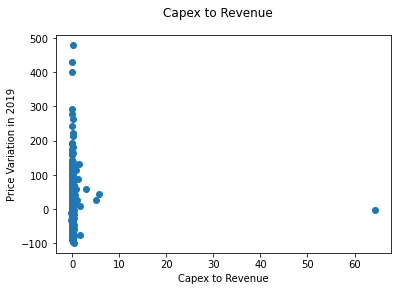

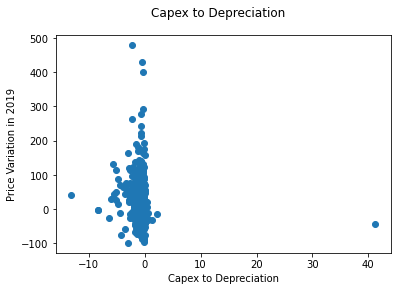

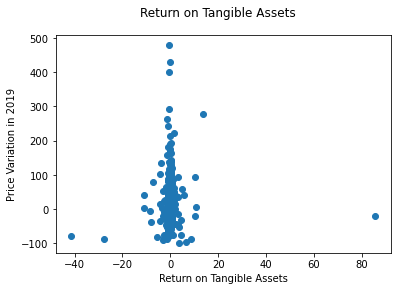

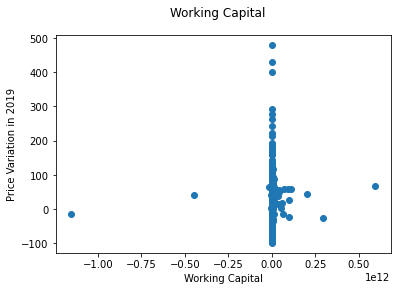

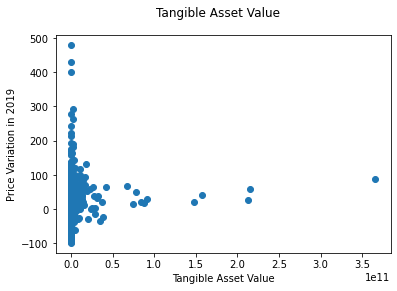

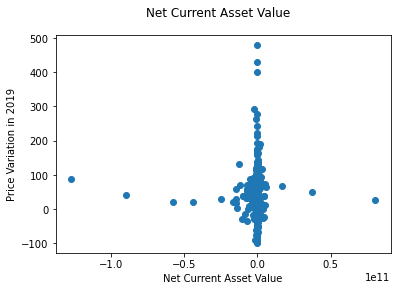

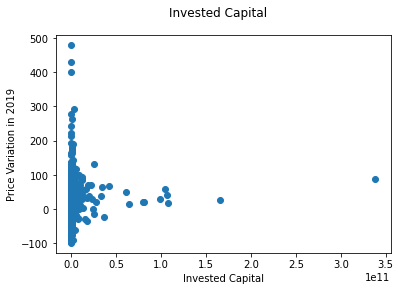

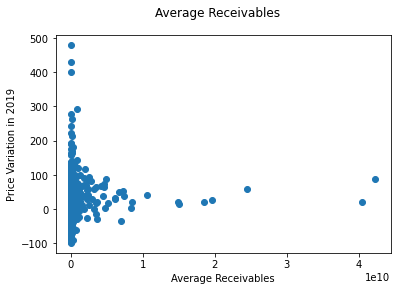

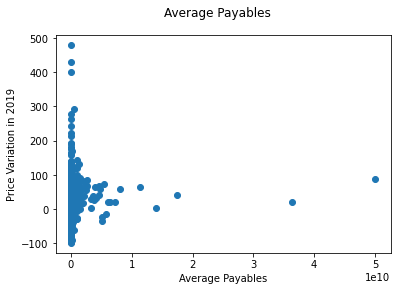

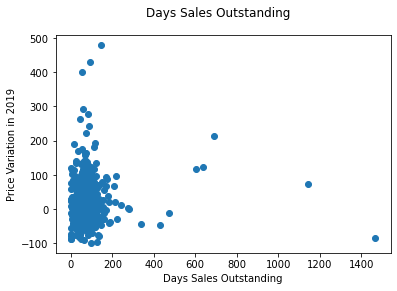

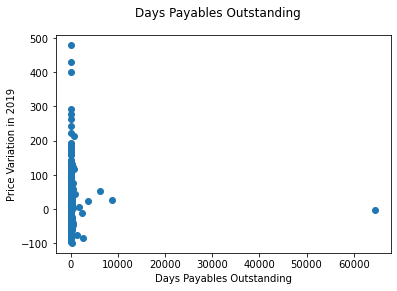

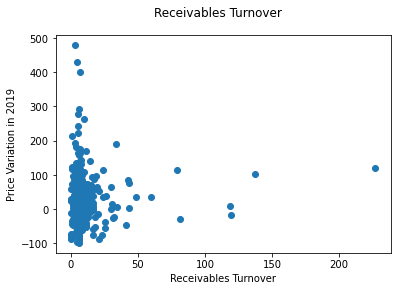

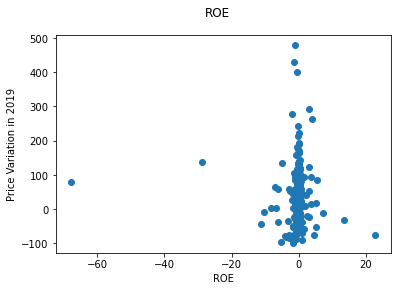

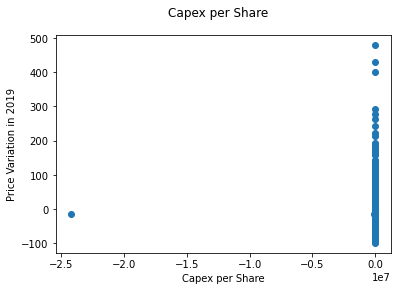

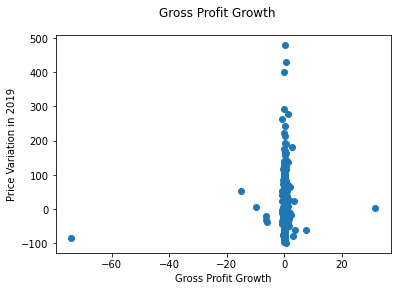

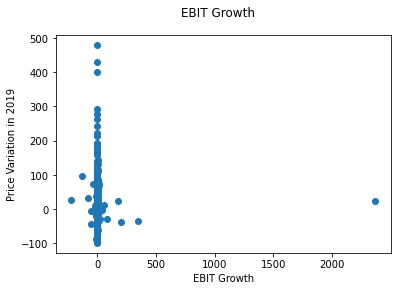

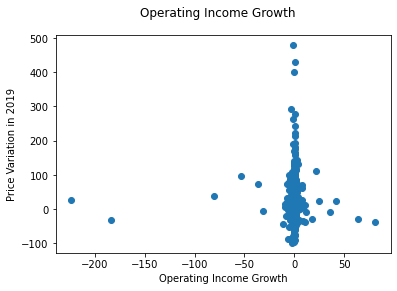

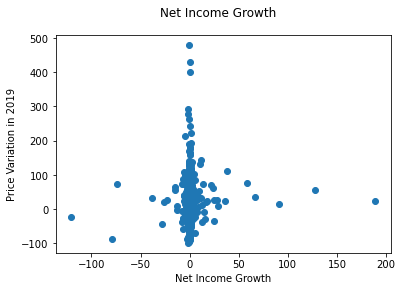

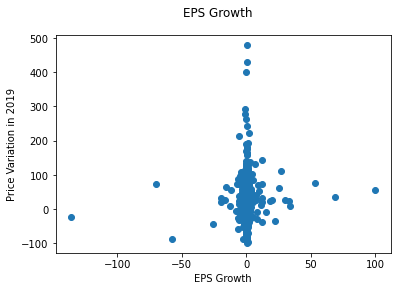

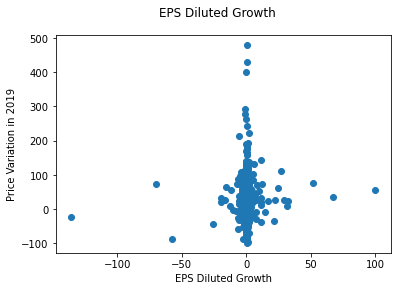

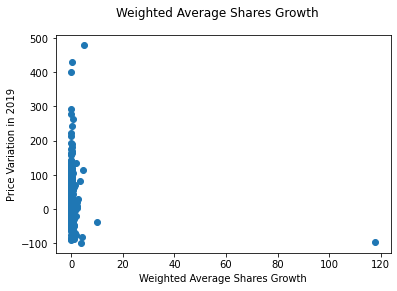

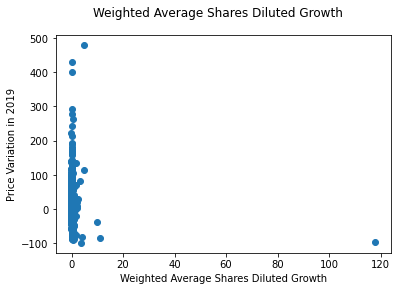

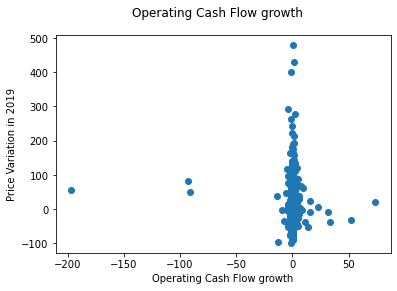

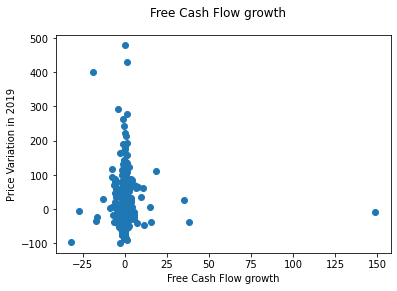

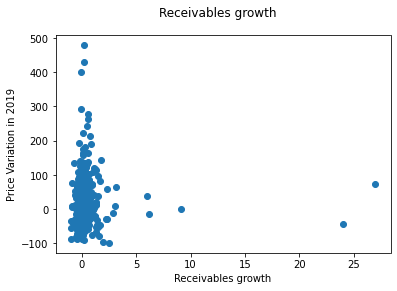

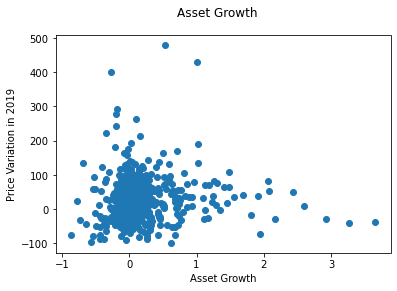

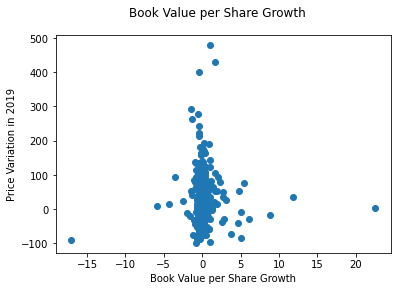

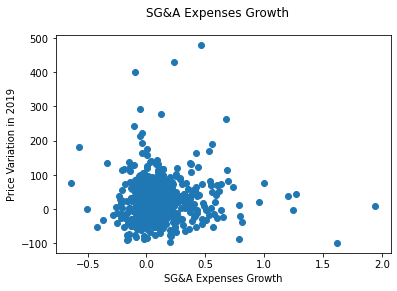

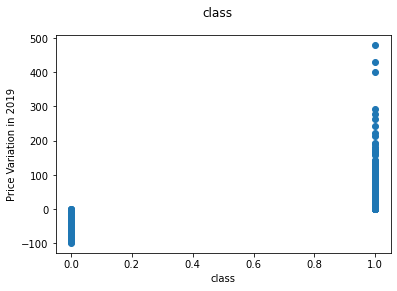

In [7]:
plot_data = pd.merge(ten_k_fillings_data, variation_data, on='Ticker', how='inner')

for col in plot_data.columns[1:-1]:
    plt.suptitle(col)
    plt.xlabel(col)
    plt.ylabel("Price Variation in 2019")
    plt.scatter(plot_data[col], plot_data[plot_data.columns[-1]])
    plt.show()

We again notice by looking at the last graph that our dataset isn't very balanced, there are a lot more companies with class 1 than class 0. We can see some of the features have a very close correlation, we can remove those in the pre-processing.

## Pre-Processing

For the pre-processing, we can start by removing features with correlation greater than 0.95, so the data can be processed faster by the classification algorithms.

In [8]:
clean_data = ten_k_fillings_data.drop(columns=["Ticker"])

# Create correlation matrix
corr_matrix = clean_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
clean_data.drop(to_drop, axis=1, inplace=True)

Considering our set is imbalanced, we will try to both oversample and undersample it, although it can probably lead to overfitting for the former and losing out on important information for the latter. 

In [16]:
down_price_data = clean_data.loc[clean_data['class'] == 0]
up_price_data = clean_data.loc[clean_data['class'] == 1]

os_dataset = pd.concat([down_price_data.sample(n=451, random_state=1, replace=True), up_price_data])
us_dataset = pd.concat([down_price_data, up_price_data.sample(n=187, random_state=1)])

## Train and Test Split

With the data pre-processed, we now need to split all 3 datasets (the original, the oversampled and the undersampled) into training and testing. We'll use 25% of the data to test the Machine Learning models and 75% to train them.

It is important to mention that the parameter `stratify` from `sklearn.model_selection.train_test_split` will be used, to guarantee that the same class-ratios between the training and testing splits are kept.

In [18]:
train_split, test_split = train_test_split(clean_data, random_state=1, test_size=0.25, stratify=clean_data['class'])

train_split_os, test_split_os = train_test_split(os_dataset, random_state=1, test_size=0.25, stratify=os_dataset['class'])

train_split_us, test_split_us = train_test_split(us_dataset, random_state=1, test_size=0.25, stratify=us_dataset['class'])

inputs_train = train_split.iloc[:, :-1].values
labels_train = train_split.iloc[:, -1].values
inputs_test = test_split.iloc[:, :-1].values
labels_test = test_split.iloc[:, -1].values

inputs_train_os = train_split_os.iloc[:, :-1].values
labels_train_os = train_split_os.iloc[:, -1].values
inputs_test_os = test_split_os.iloc[:, :-1].values
labels_test_os = test_split_os.iloc[:, -1].values

inputs_train_us = train_split_us.iloc[:, :-1].values
labels_train_us = train_split_us.iloc[:, -1].values
inputs_test_us = test_split_us.iloc[:, :-1].values
labels_test_us = test_split_us.iloc[:, -1].values

The data also needs to be standardized in order for some of the algorithms to work (K-Nearest Neighbors, Support Vector Machines). For that we'll use `sklearn.preprocessing.StandardScaler`, fitting the scaler to the `inputs_train` set and then applying it to both `inputs_train and inputs_test` with the `fit_transform()` method.

In [20]:
scaler = StandardScaler()
scaler.fit(inputs_train)

inputs_train = scaler.fit_transform(inputs_train)
inputs_test = scaler.fit_transform(inputs_test)

inputs_train_os = scaler.fit_transform(inputs_train_os)
inputs_test_os = scaler.fit_transform(inputs_test_os)

inputs_train_us = scaler.fit_transform(inputs_train_us)
inputs_test_us = scaler.fit_transform(inputs_test_us)

## Classification
After taking care of the data and our training/testing sets, we'll now apply 4 different classification algorithms - Decision Trees, Support Vector Machines, K-Nearest Neighbors and Multilayer Perceptron.

### Decision Trees

In [11]:
dt_classifier = DecisionTreeClassifier(random_state=1)

dt_tuned_parameter = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

dt_grid_search = GridSearchCV(dt_classifier,
                            param_grid=dt_tuned_parameter,
                            scoring='precision_weighted',
                            cv=10)

dt_grid_search.fit(inputs_train, labels_train)
print('Best score: {}'.format(dt_grid_search.best_score_))
print('Best parameters: {}'.format(dt_grid_search.best_params_))

Best score: 0.7239014491000895
Best parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 2, 'splitter': 'best'}


### Support Vector Machines

In [12]:
svm_classifier = SVC(random_state=1)


svm_tuned_parameters = [{'kernel': ['rbf', 'linear','poly','sigmoid'], 
                      'gamma': ['auto','scale', 1e-3, 1e-4], 
                      'C': [0.01, 0.1, 1, 10, 100],
                      'class_weight': ['balanced', None]}]


svm_grid_search = GridSearchCV(svm_classifier,
                            param_grid=svm_tuned_parameters,
                            scoring='precision_weighted',
                            n_jobs=-1,
                            cv=10)

svm_grid_search.fit(inputs_train, labels_train)

print('Best score: {}'.format(svm_grid_search.best_score_))
print('Best parameters: {}'.format(svm_grid_search.best_params_))

Best score: 0.7126628935827595
Best parameters: {'C': 100, 'class_weight': None, 'gamma': 0.0001, 'kernel': 'rbf'}


### K-Nearest Neighbors

In [13]:
knn_classifier = KNeighborsClassifier()

knn_tuned_parameters = {'n_neighbors': list(range(1,30)),
                    'weights': ['uniform','distance'],
                    'p':[1,2]}

knn_grid_search = GridSearchCV(knn_classifier, 
                    knn_tuned_parameters,
                    scoring='precision_weighted',
                    n_jobs=-1,
                    cv=10)


knn_grid_search.fit(inputs_train, labels_train)

print('Best score: {}'.format(knn_grid_search.best_score_))
print('Best parameters: {}'.format(knn_grid_search.best_params_))

Best score: 0.7179400084297429
Best parameters: {'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}


### Multilayer Perceptron

In [14]:
mlp_classifier = MLPClassifier(random_state=1, early_stopping=False)


mlp_tuned_parameters = {'hidden_layer_sizes': [(32,), (64,), (32, 64, 32)],
                    'activation': ['logistic','tanh', 'relu'],
                    'solver': ['adam', 'sgd', 'lbfgs'], #'lbfgs'
                    'alpha': [0.0001, 0.05],
                    'learning_rate': ['constant','adaptive']}

mlp_grid_search = GridSearchCV(mlp_classifier, 
                    mlp_tuned_parameters,
                    scoring='precision_weighted',
                    n_jobs=-1,
                    cv=10)

mlp_grid_search.fit(inputs_train, labels_train)

print('Best score: {}'.format(mlp_grid_search.best_score_))
print('Best parameters: {}'.format(mlp_grid_search.best_params_))

Best score: 0.7437973895619656
Best parameters: {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'solver': 'adam'}


## Model Evaluation

In [15]:
print(53 * '=')
print("Decision Trees:")
print(classification_report(labels_test, dt_grid_search.predict(inputs_test), target_names=['Ignore', 'Buy']))
print(53 * '=')
print("Support Vector Machines:")
print(classification_report(labels_test, svm_grid_search.predict(inputs_test), target_names=['Ignore', 'Buy']))
print(53 * '=')
print("K-Nearest Neighbors:")
print(classification_report(labels_test, knn_grid_search.predict(inputs_test), target_names=['Ignore', 'Buy']))
print(53 * '=')
print("Multilayer Perceptron:")
print(classification_report(labels_test, mlp_grid_search.predict(inputs_test), target_names=['Ignore', 'Buy']))
print(53 * '=')

Decision Trees:
              precision    recall  f1-score   support

      Ignore       0.40      0.68      0.50        47
         Buy       0.81      0.57      0.67       113

    accuracy                           0.60       160
   macro avg       0.60      0.62      0.58       160
weighted avg       0.69      0.60      0.62       160

Support Vector Machines:
              precision    recall  f1-score   support

      Ignore       0.44      0.09      0.14        47
         Buy       0.72      0.96      0.82       113

    accuracy                           0.70       160
   macro avg       0.58      0.52      0.48       160
weighted avg       0.64      0.70      0.62       160

K-Nearest Neighbors:
              precision    recall  f1-score   support

      Ignore       0.53      0.17      0.26        47
         Buy       0.73      0.94      0.82       113

    accuracy                           0.71       160
   macro avg       0.63      0.55      0.54       160
weighted avg